In [30]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv(r"C:\Users\Aston\Downloads\netflow_sampling_1000_50-50_test.csv")
df.head()

,#:unix_secs,unix_nsecs,sysuptime,exaddr,dpkts,doctets,first,last,engine_type,engine_id,...,srcport,dstport,prot,tos,tcp_flags,src_mask,dst_mask,src_as,dst_as,Label
0,1592206897,921732,34489240,152.148.48.1,2,2984,34429852,34429868,0,0,...,494,40924,6,0,16,0,0,0,0,0
1,1592206897,921732,34489240,152.148.48.1,1,4372,34431104,34431104,0,0,...,222,38350,6,0,16,0,0,0,0,0
2,1592206897,921732,34489240,152.148.48.1,2,2984,34431592,34431632,0,0,...,163,42706,6,0,16,0,0,0,0,0
3,1592206897,921732,34489240,152.148.48.1,1,1492,34431824,34431824,0,0,...,273,58850,6,0,16,0,0,0,0,0
4,1592206897,921732,34489240,152.148.48.1,1,52,34431792,34431792,0,0,...,42738,443,6,0,16,0,0,0,0,0


In [108]:
columns_to_filter = ["srcaddr", "dstaddr", "srcport", "dstport", "prot"] 
columns_to_groupby = ["srcaddr","dstaddr", "srcport","dstport", "prot"] #Group the connect together that are the same. 

In [113]:

df = df.groupby(columns_to_groupby).agg(list)
df.reset_index(inplace=True)
df = df.loc[:,columns_to_filter]
print(df)

             srcaddr      dstaddr  srcport  dstport  prot
0     104.16.132.229  140.30.20.2      258    57818     6
1       104.18.85.19  140.30.20.2       49    54120     6
2       104.18.97.34  140.30.20.2       29    47224     6
3      104.19.149.54  140.30.20.2      193    36252     6
4       104.22.24.87  140.30.20.2      489    45924     6
...              ...          ...      ...      ...   ...
2572   91.228.74.148  140.30.20.2      510    57806     6
2573   91.228.74.199  140.30.20.2      223    48904     6
2574   93.184.220.29  140.30.20.2      103    46392     6
2575   93.184.220.29  140.30.20.2      174    34580     6
2576   93.184.220.43  140.30.20.2      145    57952     6

[2577 rows x 5 columns]


In [97]:
df = df.groupby("srcaddr")
df.head()

,srcaddr,dstaddr,srcport,prot,dstport
0,104.16.132.229,140.30.20.2,258,6,[[[[[[[57818]]]]]]]
1,104.18.85.19,140.30.20.2,49,6,[[[[[[[54120]]]]]]]
2,104.18.97.34,140.30.20.2,29,6,[[[[[[[47224]]]]]]]
3,104.19.149.54,140.30.20.2,193,6,[[[[[[[36252]]]]]]]
4,104.22.24.87,140.30.20.2,489,6,[[[[[[[45924]]]]]]]
...,...,...,...,...,...
2094,91.228.74.148,140.30.20.2,510,6,[[[[[[[57806]]]]]]]
2095,91.228.74.199,140.30.20.2,223,6,[[[[[[[48904]]]]]]]
2096,93.184.220.29,140.30.20.2,103,6,[[[[[[[46392]]]]]]]
2097,93.184.220.29,140.30.20.2,174,6,[[[[[[[34580]]]]]]]


In [114]:
df.to_csv("netflow.csv",index=False)

<AxesSubplot:>

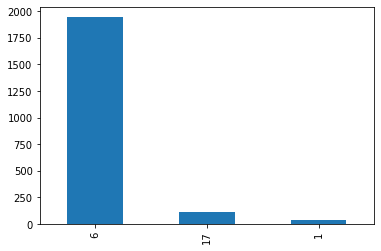

In [67]:
df["prot"].value_counts().plot(kind='bar') #protocol number https://www.iana.org/assignments/protocol-numbers/protocol-numbers.xhtml